In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd


In [2]:
from landmarks import FaceLandmarks

In [3]:
from emotion_model import LandmarkEmotionModel

In [4]:
dataset_path = '../data/face_landmarks.csv'
df = pd.read_csv(dataset_path, header=None)
y = df[df.columns[0]]               # Values of the first column (Labels)

x = df.drop(df.columns[0], axis=1)  # Rest of the columns are the features


In [5]:
print(x.shape)

(33383, 956)


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
random_seed = 42

In [8]:
x = x.values
y = y.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=random_seed)

In [9]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [10]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

y_train = torch.FloatTensor(y_train).view(-1, 1)  # Reshape to (batch_size, 1)
y_test = torch.FloatTensor(y_test).view(-1, 1)


In [11]:
y_train

tensor([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]])

# Training the model

In [12]:
# Check if GPU is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"Using device: {device}")

Using device: cuda


In [13]:
x_train = x_train.to(device)
y_train = y_train.to(device)

In [14]:
model = LandmarkEmotionModel().to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [15]:
epochs = 1000
losses = []

In [17]:
for i in range(epochs):
    y_pred = model.forward(x_train)
    loss = criterion(y_pred, y_train)

    losses.append(loss.detach().cpu().numpy())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i % 10 == 0 or i == epochs - 1:
        print(f"Epoch {i}/{epochs} - Loss: {loss.item()}")


Epoch 0/1000 - Loss: 1.708133339881897
Epoch 10/1000 - Loss: 0.42519068717956543
Epoch 20/1000 - Loss: 0.3916798233985901
Epoch 30/1000 - Loss: 0.3907419443130493
Epoch 40/1000 - Loss: 0.390966534614563
Epoch 50/1000 - Loss: 0.39035913348197937
Epoch 60/1000 - Loss: 0.3897849917411804
Epoch 70/1000 - Loss: 0.38911017775535583
Epoch 80/1000 - Loss: 0.38879555463790894
Epoch 90/1000 - Loss: 0.3885821998119354
Epoch 100/1000 - Loss: 0.3884093463420868
Epoch 110/1000 - Loss: 0.3882286846637726
Epoch 120/1000 - Loss: 0.38809657096862793
Epoch 130/1000 - Loss: 0.3879678249359131
Epoch 140/1000 - Loss: 0.3878363370895386
Epoch 150/1000 - Loss: 0.3876917362213135
Epoch 160/1000 - Loss: 0.38750892877578735
Epoch 170/1000 - Loss: 0.3873192071914673
Epoch 180/1000 - Loss: 0.38715603947639465
Epoch 190/1000 - Loss: 0.3870093822479248
Epoch 200/1000 - Loss: 0.38685140013694763
Epoch 210/1000 - Loss: 0.38667362928390503
Epoch 220/1000 - Loss: 0.3865141272544861
Epoch 230/1000 - Loss: 0.3863528072834

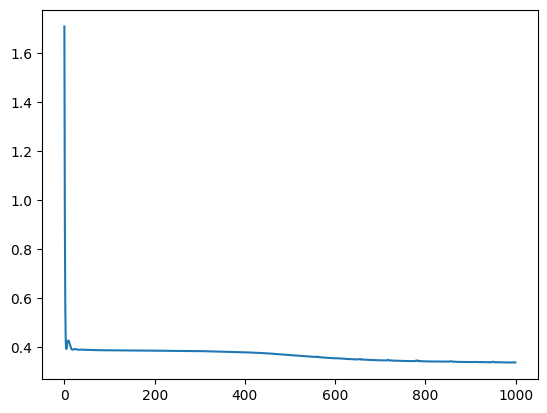

In [18]:
plt.plot(range(epochs), losses)

# Save the model

In [19]:
if 1 == 1:
    path = './models/landmark_emotion_model.pt'
    torch.save(model.state_dict(), path)